### Useful links
- Notebook with [chembl_webresource_client](https://github.com/chembl/chembl_webresource_client/blob/master/demo_wrc.ipynb). It helps to download data
- [Example](https://github.com/rdkit/UGM_2014/blob/master/Notebooks/Vardenafil.ipynb) of working with molecules
- https://www.ebi.ac.uk/chembl/

**SMILE** -- Simplified Molecular Input Line Entry Specification (canonical format)
**ChEMBL** or ChEMBLdb is a manually curated chemical database of bioactive molecules with drug inducing properties on in the human brain

In [ ]:
# !pip install chembl_webresource_client

In [ ]:
# from chembl_webresource_client.settings import Settings
# from chembl_webresource_client.new_client import new_client

# Settings.Instance().TIMEOUT = 10

In [40]:
!pip install pandas
!pip install rdkit
!pip install karateclub
!pip install networkx
!pip install karateclub
!pip install tqdm
!pip install seaborn
!pip install scikit-learn
!pip install openTSNE
!pip install xgboost

In [59]:
import pandas as pd
import numpy as np
import ast
import networkx as nx

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem.QED import qed
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from tqdm import tqdm
from karateclub import Graph2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from openTSNE import TSNE
import xgboost as xgb

import seaborn as sns
sns.set(rc={'figure.figsize':(9, 7)})
palette = sns.color_palette("bright", 10)

For working with SMILE we've used popular package [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html), which is used in many chemical projects and packages. It utilized all work on reading, writing and drawing moleculas.

### Work with prepared data (in below sections there is a code for building this dataset)

In [2]:
!wget https://www.dropbox.com/s/hw9282d7gbj7y1y/dataset_final.csv

--2023-06-20 19:55:23--  https://www.dropbox.com/s/hw9282d7gbj7y1y/dataset_final.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hw9282d7gbj7y1y/dataset_final.csv [following]
--2023-06-20 19:55:23--  https://www.dropbox.com/s/raw/hw9282d7gbj7y1y/dataset_final.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbef48a079756261020a9bb1d47.dl.dropboxusercontent.com/cd/0/inline/B-Xox6uB2myNr9lm63yw4IneljgQNb6G5JMvbM6j0hzswZfRNXOv7VSojD3rxwcsWeL7BXmAvjH0OVD4-WYKylX2oPWp5Roy9V0UblicdHL0dCUYG9lNHdpDtf_FcxeMLKFDAJypXeISKRvCr4vvoguL8Y_YhsSrul7zm4VJQvSvYQ/file# [following]
--2023-06-20 19:55:24--  https://ucbef48a079756261020a9bb1d47.dl.dropboxusercontent.com/cd/0/inline/B-Xox6uB2myNr9lm63yw4IneljgQNb6G5JMvbM6j0hzswZfRNXOv7VSojD3rxw

In [3]:
df = pd.read_csv('dataset_final.csv')
df.head().T

,0,1,2,3,4
Unnamed: 0,0,2,3,4,5
Unnamed: 0.1,0,2,3,4,5
ChEMBL ID,CHEMBL1200559,CHEMBL1200679,CHEMBL4297506,CHEMBL363295,CHEMBL187734
Name,LACTIC ACID,ZINC CHLORIDE,DAPACONAZOLE,TERODILINE,TETRADECYLTHIOACETIC ACID
Synonyms,ACIDUM LACTICUM|DL- LACTIC ACID|DL-LACTIC ACID...,NSC-529648|ZINC CHLORIDE|ZINCUM MURIATICUM,DAPACONAZOLE,TERODILINE,TETRADECYLTHIOACETIC ACID|Tetradecylsulfanyl-A...
Type,Small molecule,Small molecule,Small molecule,Small molecule,Small molecule
Max Phase,4.0,4.0,3.0,4.0,2.0
Molecular Weight,90.08,136.3,415.24,281.44,288.5
Targets,111.0,110.0,NaN,13.0,41.0
Bioactivities,278.0,272.0,NaN,31.0,112.0


In [4]:
# df.columns

In [5]:
df[df['Name'] == 'COCAINE']['Smiles'].to_list()[0]

'COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[C@H]1N2C'

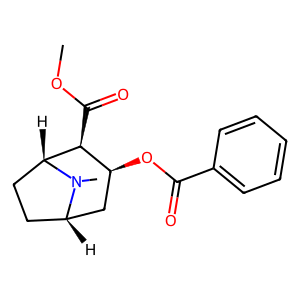

In [6]:
m = Chem.MolFromSmiles(df[df['Name'] == 'COCAINE']['Smiles'].to_list()[0])
Draw.MolToImage(m, useSVG=True, subImgSize=(300,300))

In [7]:
data = df['Smiles']
fingerprints = []
compounds = []
fpgen = AllChem.GetMorganGenerator(radius=2)
for i in tqdm(range(len(data))):
  compound = Chem.MolFromSmiles(data[i])
  compounds.append(compound)
  fp = fpgen.GetFingerprint(compound)
  fingerprints.append(fp)

 12%|█▏        | 1123/9387 [00:00<00:02, 3694.19it/s][19:55:33] WARNING: not removing hydrogen atom without neighbors
[19:55:33] WARNING: not removing hydrogen atom without neighbors
[19:55:33] WARNING: not removing hydrogen atom without neighbors
[19:55:33] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 9387/9387 [00:02<00:00, 3885.46it/s]


In [8]:
def ClusterFps(fps,cutoff=0.2):
    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists, nfps, cutoff, isDistData=True)
    return cs

In [9]:
clusters = ClusterFps(fingerprints, cutoff=0.99)
len(clusters)

31

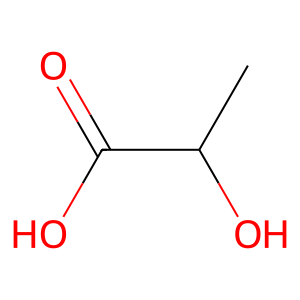

In [10]:
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0
Draw.MolToImage(compounds[clusters[0][1]], useSVG=True, subImgSize=(300,300))

---

In [11]:
qeds = []
for i in tqdm(range(len(compounds))):
  qeds.append(qed(compounds[i]))
qeds = np.array(qeds)

 15%|█▍        | 1400/9387 [00:01<00:09, 822.51it/s][19:56:09] WARNING: not removing hydrogen atom without neighbors
[19:56:09] WARNING: not removing hydrogen atom without neighbors
[19:56:09] WARNING: not removing hydrogen atom without neighbors
[19:56:09] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 9387/9387 [00:11<00:00, 840.23it/s]


In [12]:
print(f"Accuracy score: {accuracy_score(df['is_drug'], qeds < 0.6)}")
print(f"F1-score: {f1_score(df['is_drug'], qeds < 0.6)}")

Accuracy score: 0.5479919036966017
F1-score: 0.5830794929743539


In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,...,HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,is_drug,mol
0,0,0,CHEMBL1200559,LACTIC ACID,ACIDUM LACTICUM|DL- LACTIC ACID|DL-LACTIC ACID...,Small molecule,4.0,90.08,111.0,278.0,...,2,0,90.0317,0.53,ACID,C3H6O3,CC(O)C(=O)O,JVTAAEKCZFNVCJ-UHFFFAOYSA-N,1,<rdkit.Chem.rdchem.Mol object at 0x7f7bc0c02ab0>
1,2,2,CHEMBL1200679,ZINC CHLORIDE,NSC-529648|ZINC CHLORIDE|ZINCUM MURIATICUM,Small molecule,4.0,136.30,110.0,272.0,...,None,None,133.8668,None,None,Cl2Zn,[Cl-].[Cl-].[Zn+2],JIAARYAFYJHUJI-UHFFFAOYSA-L,1,<rdkit.Chem.rdchem.Mol object at 0x7f7bb7d133e0>
2,3,3,CHEMBL4297506,DAPACONAZOLE,DAPACONAZOLE,Small molecule,3.0,415.24,NaN,NaN,...,0,1,414.0514,-1.14,NEUTRAL,C19H15Cl2F3N2O,FC(F)(F)c1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,FUAHXHWSMYFWGE-UHFFFAOYSA-N,1,<rdkit.Chem.rdchem.Mol object at 0x7f7bb7d12570>
3,4,4,CHEMBL363295,TERODILINE,TERODILINE,Small molecule,4.0,281.44,13.0,31.0,...,1,0,281.2143,-0.22,BASE,C20H27N,CC(CC(c1ccccc1)c1ccccc1)NC(C)(C)C,UISARWKNNNHPGI-UHFFFAOYSA-N,1,<rdkit.Chem.rdchem.Mol object at 0x7f7bb7d12650>
4,5,5,CHEMBL187734,TETRADECYLTHIOACETIC ACID,TETRADECYLTHIOACETIC ACID|Tetradecylsulfanyl-A...,Small molecule,2.0,288.50,41.0,112.0,...,1,1,288.2123,-0.27,ACID,C16H32O2S,CCCCCCCCCCCCCCSCC(=O)O,IPBCWPPBAWQYOO-UHFFFAOYSA-N,1,<rdkit.Chem.rdchem.Mol object at 0x7f7bb7d126c0>


In [15]:
print(">>> read the data file ... ")
df = pd.read_csv('dataset_final.csv')
print(">>> data shape = ", df.shape)
print(">>> data columns = ", df.columns, "\n")
# print(df)
print()

print(">>> create mol from smiles ... ")
df['mol'] = df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# define the function for coverting rdkit object to networkx object -----------
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())

    return G

print(">>> create nx from mol ... ")
df['graph'] = df['mol'].apply(lambda x: mol_to_nx(x))

print(">>> create graph embedding ... ")
model = Graph2Vec()
model.fit(df['graph'])
df_graph2vec = model.get_embedding()

df_graph2vec = pd.DataFrame(df_graph2vec)
print(">>> df_graph2vec shape = ", df_graph2vec.shape)
# print(df_graph2vec)
print()

>>> read the data file ... 
>>> data shape =  (9387, 37)
>>> data columns =  Index(['Unnamed: 0', 'Unnamed: 0.1', 'ChEMBL ID', 'Name', 'Synonyms', 'Type',
       'Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key',
       'is_drug', 'mol'],
      dtype='object') 


>>> create mol from smiles ... 


[19:57:16] WARNING: not removing hydrogen atom without neighbors
[19:57:16] WARNING: not removing hydrogen atom without neighbors
[19:57:16] WARNING: not removing hydrogen atom without neighbors
[19:57:16] WARNING: not removing hydrogen atom without neighbors


>>> create nx from mol ... 
>>> create graph embedding ... 
>>> df_graph2vec shape =  (9387, 128)



In [16]:
df_graph2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.082630,0.085415,-0.111999,0.107067,0.046354,-0.024293,0.087524,-0.043384,-0.008348,0.030136,...,0.018307,-0.029364,-0.023271,0.036738,0.013365,-0.023466,-0.060398,0.071563,0.008637,0.051249
1,0.109184,0.085819,-0.186469,0.124321,0.043386,0.001787,0.115865,-0.049274,0.020717,0.009672,...,0.057942,-0.050243,-0.009323,0.082129,0.015403,-0.067230,-0.012047,0.127160,-0.002006,0.056288
2,0.063426,0.060754,-0.097218,0.101290,0.048371,-0.022499,0.070010,-0.037783,0.001754,0.033387,...,0.010336,-0.001878,-0.021157,0.022715,0.022824,-0.035032,-0.019144,0.057537,-0.010990,0.038455
3,0.080118,0.072520,-0.116413,0.109314,0.046299,-0.018112,0.089510,-0.047197,-0.005088,0.043337,...,0.016600,-0.007956,-0.016503,0.036358,0.026506,-0.046101,-0.025152,0.081496,-0.002330,0.041415
4,0.063765,0.056892,-0.093619,0.073420,0.032392,-0.012131,0.078165,-0.041541,0.001913,0.018284,...,0.008619,-0.019096,-0.025542,0.024036,-0.003311,-0.017577,-0.041206,0.043565,0.009917,0.034199


In [17]:
tsne = TSNE(
    n_components=2,
    init='random',
)

In [18]:
tsne = tsne.fit_transform(df_graph2vec)

In [19]:
tsne.shape

(9387, 2)

/tmp/ipykernel_19730/960625578.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=y, legend='full', palette=palette)


<Axes: >

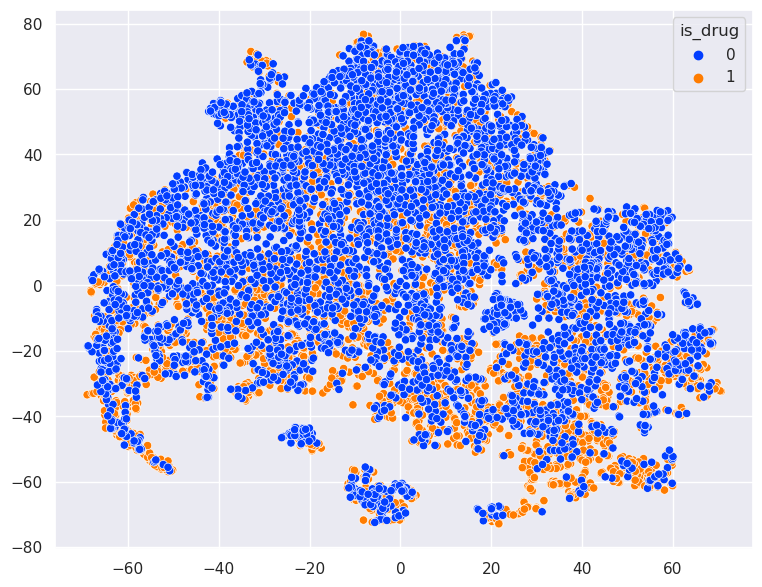

In [20]:
y = df['is_drug']
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=y, legend='full', palette=palette)

In [21]:
pca = PCA(n_components=2, svd_solver='arpack')
pca = pca.fit_transform(df_graph2vec)

In [22]:
pca.shape

(9387, 2)

/tmp/ipykernel_19730/563010997.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=y, legend='full', palette=palette)


<Axes: >

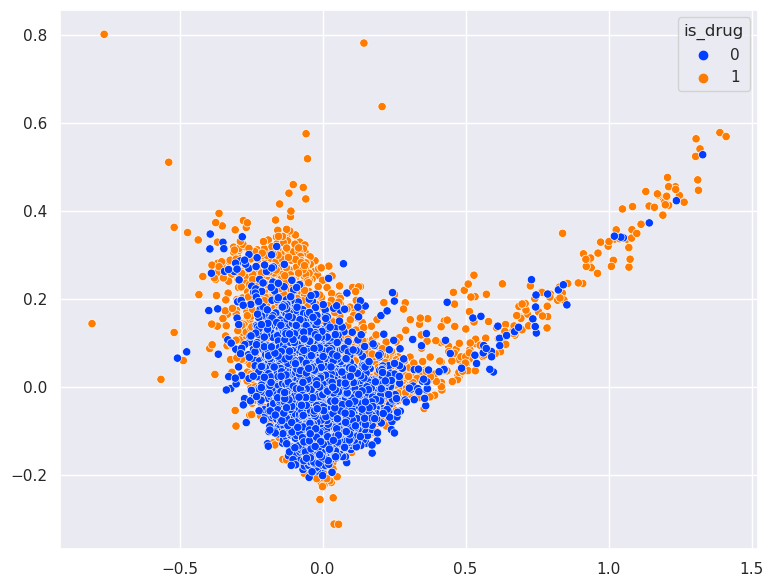

In [23]:
y = df['is_drug']
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=y, legend='full', palette=palette)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_graph2vec, y, test_size=0.2, random_state=42)

In [25]:
rf = RandomForestClassifier()

In [26]:
print(len(X_train))
print(len(y_train))

7509
7509


In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
print(f"Accuracy score train: {accuracy_score(rf.predict(X_train), y_train)}")
print(f"Accuracy score test: {accuracy_score(rf.predict(X_test), y_test)}")

print(f"Accuracy score train: {f1_score(rf.predict(X_train), y_train)}")
print(f"Accuracy score test: {f1_score(rf.predict(X_test), y_test)}")

Accuracy score train: 1.0
Accuracy score test: 0.6586794462193823
Accuracy score train: 1.0
Accuracy score test: 0.6288361320208454


In [146]:
clf = RandomForestClassifier()
cross_val_score(clf, df_graph2vec, y, cv=5, scoring="f1")

array([0.61592506, 0.59228972, 0.62857143, 0.62436261, 0.58201058])

## ECFP embediing approache

In [30]:
from rdkit.Chem import AllChem
# define function that transforms SMILES strings into ECFPs
def ECFP_from_moles(moles,
                     R = 2,
                     L = 2**10):
    """
    Inputs:

    - smiles ... SMILES string of input compound
    - R ... maximum radius of circular substructures
    - L ... fingerprint-length

    Outputs:
    - np.array(feature_list) ... ECFP with length L and maximum radius R
    """

    res = []
    for molecule in tqdm(moles):
      res.append(AllChem.GetMorganFingerprintAsBitVect(
          molecule,
          radius = R,
          nBits = L))
    return np.array(res)

In [32]:
ECFP_embeddings = ECFP_from_moles(df['mol'])

100%|██████████| 9387/9387 [00:00<00:00, 13529.25it/s]


In [33]:
ECFP_embeddings.shape

(9387, 1024)

In [34]:
clf = RandomForestClassifier()
cross_val_score(clf, ECFP_embeddings, y, cv=5, scoring="f1")

array([0.83609366, 0.82380127, 0.83834373, 0.83361534, 0.81434355])

In [41]:
parameters = {
    'n_estimators': [100, 500],
    'max_depth': [None] + list(range(3, 8, 1))}

model = RandomForestClassifier(random_state=42)
clf = GridSearchCV(
    model,
    parameters,
    cv=5,
    scoring='f1',
    refit=True,
    n_jobs=-1,)
clf.fit(ECFP_embeddings, y)
best_ecfp_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.7079862287834252
{'max_depth': None, 'n_estimators': 500}


In [35]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ECFP_embeddings_scaler = scaler.fit_transform(ECFP_embeddings)


In [36]:
pca = PCA(512)
X_pca512 = pca.fit_transform(ECFP_embeddings_scaler)
print(pca.explained_variance_ratio_.sum())

0.7589577466371523


In [37]:
ECFP_embeddings_tsne = TSNE().fit(X_pca512)

/tmp/ipykernel_19730/2868227110.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=ECFP_embeddings_tsne[:, 0], y=ECFP_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)


<Axes: >

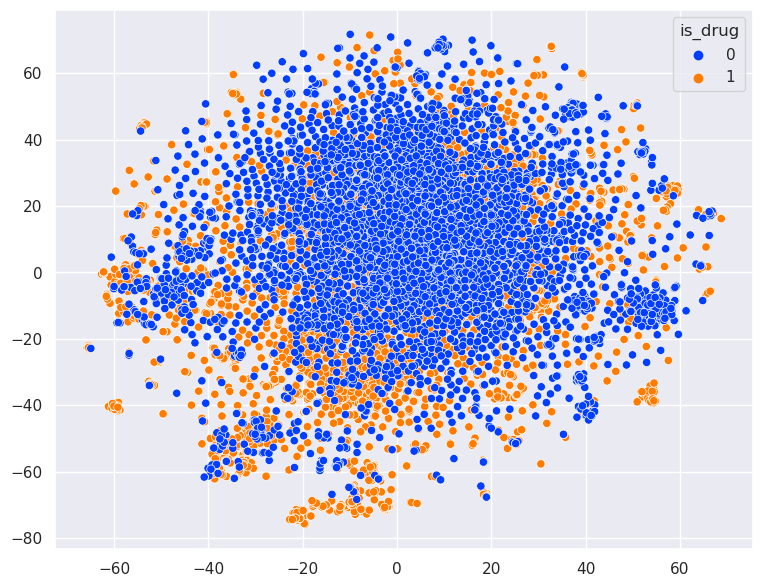

In [40]:
sns.scatterplot(x=ECFP_embeddings_tsne[:, 0], y=ECFP_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)

In [53]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None] + list(range(3, 8, 1))}

model = GradientBoostingClassifier(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(ECFP_embeddings, y)
best_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.7094007865930159
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [34]:
parameters = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']}

model = SVC(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(ECFP_embeddings, y)
best_SVC = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

KeyboardInterrupt: 

In [47]:
parameters = {
    'min_child_weight': [1],
    'gamma': [2],
    'subsample': [0.8],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [7]
}

model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=15, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(ECFP_embeddings, y)
best_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.70577044163983
{'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}


In [83]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_ECFP_scores = cross_val_score(clf, ECFP_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("Random Forest", rfc_ECFP_scores)
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42)
gbc_ECFP_scores = cross_val_score(clf, ECFP_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("Gradient Boosting", gbc_ECFP_scores)
clf = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svc_ECFP_scores = cross_val_score(clf, ECFP_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("SVC", svc_ECFP_scores)
clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=15, seed=42, colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8)
xgb_ECFP_scores = cross_val_score(clf, ECFP_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("XGB", xgb_ECFP_scores)

Random Forest [0.83180778 0.83036228 0.8536175  0.8500283  0.82113821]
Gradient Boosting [0.84314805 0.85462555 0.85931559 0.86042693 0.84002199]
SVC [0.85914733 0.86731392 0.86979441 0.87823276 0.85283019]
XGB [0.83821093 0.82989403 0.84280199 0.84505495 0.82773803]


## MACCS embediing approache

In [45]:
def compute_MACCS(mols):
        res = []
        for mol in tqdm(mols):
            ds = list(MACCSkeys.GenMACCSKeys(mol).ToBitString())
            res.append(ds)
        return res

In [46]:
MACCS_embeddings = compute_MACCS(df['mol'])

100%|██████████| 9387/9387 [00:07<00:00, 1297.86it/s]


In [47]:
parameters = {
    'n_estimators': [100, 500],
    'max_depth': [None] + list(range(3, 8, 1))}

model = RandomForestClassifier(random_state=42)
clf = GridSearchCV(
    model,
    parameters,
    cv=5,
    scoring='f1',
    refit=True,
    n_jobs=-1,)
clf.fit(MACCS_embeddings, y)
best_macca_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.7829447419249043
{'max_depth': None, 'n_estimators': 500}


In [48]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None] + list(range(3, 8, 1))}

model = GradientBoostingClassifier(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(MACCS_embeddings, y)
best_macca_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.7994727430085752
{'learning_rate': 0.25, 'max_depth': 7, 'n_estimators': 200}


In [49]:
parameters = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']}

model = SVC(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(MACCS_embeddings, y)
best_maccs_SVC = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.8006560849572553
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [56]:
parameters = {
    'min_child_weight': [1, 5, 7],
    'gamma': [1.5, 2, 2.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}


model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=20, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='f1',
    refit=True,
    n_jobs=-1)
clf.fit(np.array(MACCS_embeddings).astype('int'), y)
best_maccs_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

0.7708524214880527
{'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


In [84]:
clf = RandomForestClassifier(n_estimators=500, random_state=42)
rfc_MACCS_scores = cross_val_score(clf, MACCS_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("Random Forest", rfc_MACCS_scores)
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, max_depth=7, random_state=42)
gbc_MACCS_scores = cross_val_score(clf, MACCS_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("Gradient Boosting", gbc_MACCS_scores)
clf = SVC(C=100, gamma=0.1, kernel='rbf', random_state=42)
svc_MACCS_scores = cross_val_score(clf, MACCS_embeddings, y, cv=5, n_jobs=-1, scoring='f1')
print("SVC", svc_MACCS_scores)
clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=15, seed=42, colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8)
XGB_MACCS_scores = cross_val_score(clf, np.array(MACCS_embeddings).astype('int'), y, cv=5, n_jobs=-1, scoring='f1')
print("XGB", XGB_MACCS_scores)

Random Forest [0.775      0.77956372 0.79067122 0.79689234 0.77259643]
Gradient Boosting [0.80108401 0.78828082 0.80890337 0.80901288 0.79008264]
SVC [0.79651795 0.79800775 0.80422692 0.81219904 0.79232877]
XGB [0.75744212 0.77433628 0.77008929 0.78978816 0.75823562]


## ECFP + other props from ChemBL

In [60]:
df_extra = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'ChEMBL ID', 'Name', 'Synonyms', 'Molecular Formula', 'Inchi Key', 'mol', 'graph', 'Targets', 'Bioactivities', 'CX Acidic pKa', 'CX Basic pKa'], axis=1).replace('None', np.nan).replace('NaN', np.nan)
df_extra = df_extra.fillna(value={'Max Phase': 0})
for col in df_extra:
    if col not in ['Molecular Species', 'Structure Type', 'Type', 'Passes Ro3', 'Smiles', 'is_drug']:
        df_extra[col] = df_extra[col].astype('float')
df_extra = df_extra.dropna()
df_extra['mol'] = df_extra['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df_extra = df_extra.reset_index().drop('index', axis=1)
le = LabelEncoder()
for col in ['Molecular Species', 'Structure Type', 'Type', 'Passes Ro3']:
    le.fit(df_extra[col])
    df_extra[col] = le.transform(df_extra[col])
df_extra.T

,0,1,2,3,4,5,6,7,8,9,...,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780
Type,3,3,3,3,3,3,3,3,3,3,...,3,4,3,3,3,3,3,3,3,3
Max Phase,4.0,3.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Molecular Weight,90.08,415.24,281.44,288.5,558.6,363.52,667.62,454.97,690.86,428.66,...,383.88,640.59,297.38,593.59,334.34,393.48,487.73,341.41,566.77,340.33
AlogP,-0.55,6.17,4.99,5.51,4.17,3.55,6.47,3.89,2.27,7.18,...,6.85,4.62,3.29,3.71,4.08,4.81,4.98,3.6,4.12,2.93
Polar Surface Area,57.53,27.05,12.03,37.3,162.16,59.28,91.75,72.83,176.42,43.37,...,44.47,141.0,39.94,168.36,107.22,62.91,73.83,68.46,100.63,81.43
HBA,2.0,3.0,1.0,2.0,11.0,3.0,4.0,5.0,11.0,3.0,...,1.0,7.0,5.0,11.0,6.0,5.0,4.0,5.0,7.0,6.0
HBD,2.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,...,2.0,2.0,1.0,4.0,2.0,1.0,3.0,0.0,2.0,1.0
#RO5 Violations,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
#Rotatable Bonds,1.0,6.0,5.0,15.0,10.0,15.0,5.0,2.0,7.0,9.0,...,3.0,8.0,4.0,9.0,4.0,7.0,12.0,4.0,11.0,2.0
Passes Ro3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
ECFP_extra = ECFP_from_moles(df_extra['mol'])
ECFP_extra_with_prop = df_extra.join(pd.DataFrame(ECFP_extra))

100%|██████████| 8781/8781 [00:00<00:00, 16381.93it/s]


In [62]:
X_extra = ECFP_extra_with_prop.drop(['is_drug', 'Smiles', 'mol', 'Max Phase'], axis=1)
y_extra = ECFP_extra_with_prop['is_drug']

clf = RandomForestClassifier(n_estimators=1000, random_state=42)
print('RandomForestClassifier', cross_val_score(clf, X_extra.values, y_extra.values, cv=10, n_jobs=-1, scoring='f1'))
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42)
print('GradientBoostingClassifier', cross_val_score(clf, X_extra.values, y_extra.values, cv=10, n_jobs=-1, scoring='f1'))
clf = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
print('SVC', cross_val_score(clf, X_extra.values, y_extra.values, cv=10, n_jobs=-1, scoring='f1'))
clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=15, seed=42, colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8)
print('XGB', cross_val_score(clf, X_extra.values, y_extra.values, cv=10, n_jobs=-1, scoring='f1'))

RandomForestClassifier [0.99638118 1.         0.99879081 0.99757869 0.99879081 0.99879081
 0.99757869 0.99758454 0.99637243 0.99757869]
GradientBoostingClassifier [0.99758454 1.         0.99879081 0.99757869 0.99879081 0.99515738
 0.99757869 0.99758454 0.99878788 0.99878788]
SVC [0.72009864 0.73543689 0.70558376 0.70243902 0.72222222 0.75401731
 0.70873786 0.73420739 0.72682324 0.73658537]
XGB [0.99758454 1.         0.99879081 0.99757869 0.99879081 1.
 0.99757869 0.99758454 0.99878788 0.99878788]


In [65]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

def draw_importance(importances, model_name, columns, max_features=None):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    if max_features is None:
        num_to_plot = len(columns)
    else:
        num_to_plot = max_features
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    

In [80]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_extra.values, y_extra.values)
draw_importance(clf.feature_importances_, "Random Forest", X_extra.columns, 5)

Feature ranking:
1. Inorganic Flag 0.345369 
2. Np Likeness Score 0.031412 
3. Type 0.020577 
4. CX LogD 0.015187 
5. Aromatic Rings 0.013943 


In [81]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=7, random_state=42)
clf.fit(X_extra.values, y_extra.values)
draw_importance(clf.feature_importances_, "Gradient Boosting", X_extra.columns, 5)

Feature ranking:
1. Inorganic Flag 0.994516 
2. QED Weighted 0.000570 
3. 24 0.000392 
4. 272 0.000303 
5. Molecular Weight 0.000204 


In [85]:
clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, nthread=15, seed=42, colsample_bytree=1.0, gamma=2, max_depth=7, min_child_weight=1, subsample=0.8)
clf.fit(X_extra.values, y_extra.values)
draw_importance(clf.feature_importances_, "XGB", X_extra.columns, 5)

Feature ranking:
1. Inorganic Flag 0.775309 
2. QED Weighted 0.005038 
3. 429 0.004861 
4. 792 0.004788 
5. 128 0.004737 


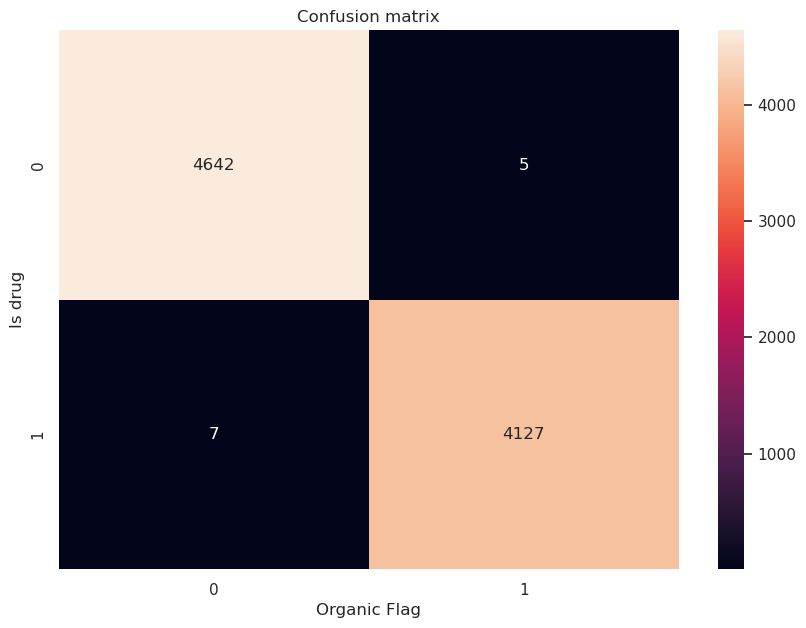

In [79]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(X_extra['Inorganic Flag'].replace(0, 1).replace(-1, 0).astype('int'), y_extra)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('Is drug')
plt.xlabel('Organic Flag')
plt.show()

## TSNE drawing

In [86]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ECFP_embeddings_scaler = scaler.fit_transform(ECFP_embeddings)

In [109]:
ECFP_embeddings_tsne = TSNE(perplexity=700, exaggeration=1).fit(ECFP_embeddings_scaler)

/tmp/ipykernel_19730/2307857702.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=ECFP_embeddings_tsne[:, 0], y=ECFP_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)


<Axes: >

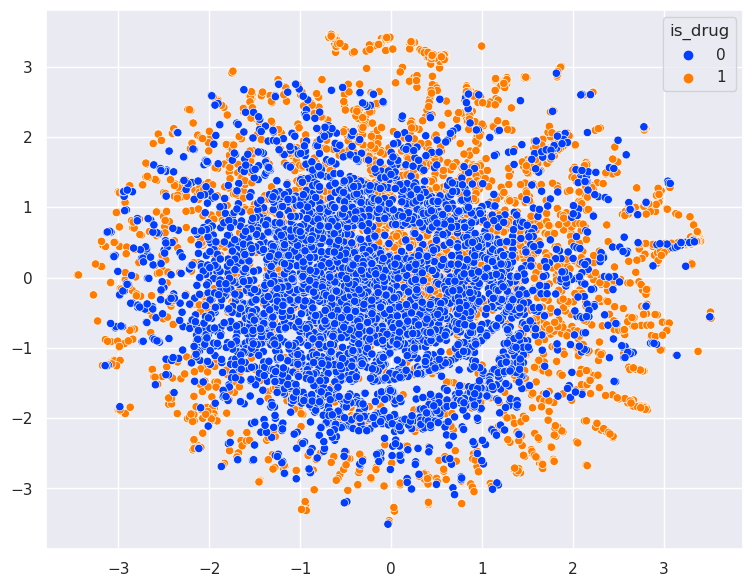

In [111]:
sns.scatterplot(x=ECFP_embeddings_tsne[:, 0], y=ECFP_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)

In [89]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
MACCS_embeddings_scaler = scaler.fit_transform(MACCS_embeddings)

In [105]:
MACCS_embeddings_tsne = TSNE(perplexity=1000, exaggeration=2).fit(MACCS_embeddings_scaler)

/tmp/ipykernel_19730/991122086.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=MACCS_embeddings_tsne[:, 0], y=MACCS_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)


<Axes: >

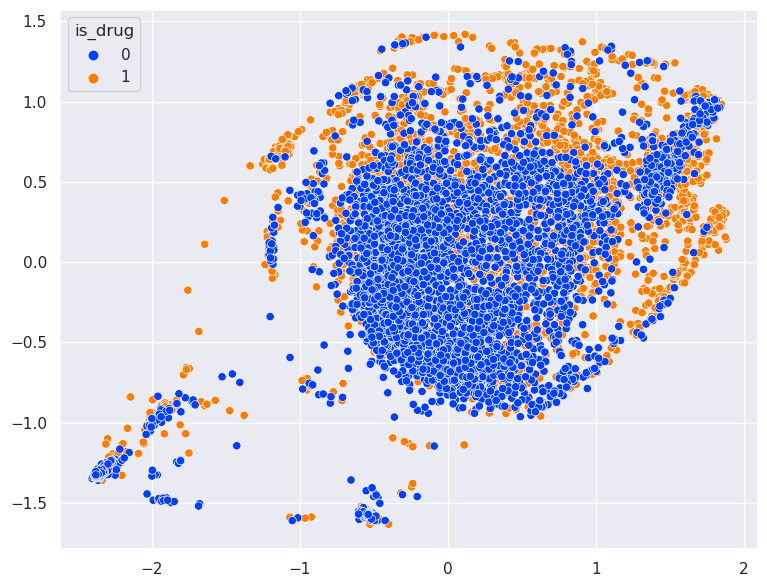

In [106]:
sns.scatterplot(x=MACCS_embeddings_tsne[:, 0], y=MACCS_embeddings_tsne[:, 1], hue=y, legend='full', palette=palette)

In [114]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Mix_embeddings_scaler = scaler.fit_transform(ECFP_extra_with_prop.drop(['Smiles', 'mol', 'Max Phase'], axis=1).values)

In [122]:
Mix_embeddings_tsne = TSNE(perplexity=50, exaggeration=2).fit(Mix_embeddings_scaler)

/tmp/ipykernel_19730/3728909991.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=Mix_embeddings_tsne[:, 0], y=Mix_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)


<Axes: >

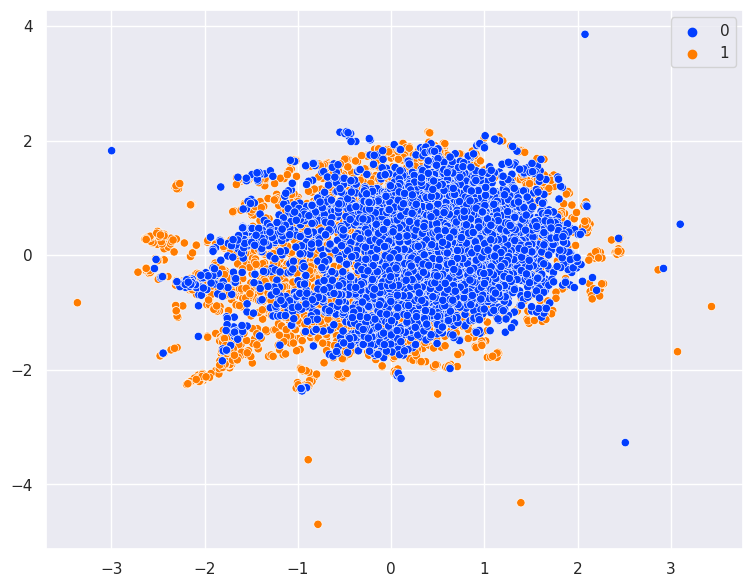

In [123]:
sns.scatterplot(x=Mix_embeddings_tsne[:, 0], y=Mix_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)

In [124]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Mix_without_graph_embeddings_scaler = scaler.fit_transform(df_extra.drop(['Smiles', 'mol', 'Max Phase'], axis=1).values)

In [125]:
Mix_without_graph_embeddings_tsne = TSNE(perplexity=50, exaggeration=2).fit(Mix_without_graph_embeddings_scaler)

/tmp/ipykernel_19730/265374662.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=Mix_without_graph_embeddings_tsne[:, 0], y=Mix_without_graph_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)


<Axes: >

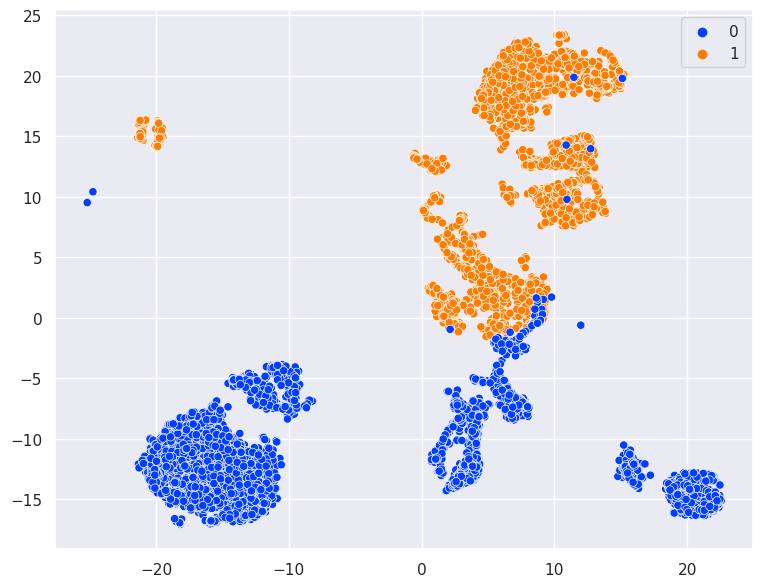

In [126]:
sns.scatterplot(x=Mix_without_graph_embeddings_tsne[:, 0], y=Mix_without_graph_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)

In [127]:
MACCS_extra = compute_MACCS(df_extra['mol'])
MACCS_extra_with_prop = df_extra.join(pd.DataFrame(MACCS_extra))

100%|██████████| 8781/8781 [00:06<00:00, 1306.98it/s]


In [128]:
from openTSNE import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
MixMACCS_without_graph_embeddings_scaler = scaler.fit_transform(MACCS_extra_with_prop.drop(['Smiles', 'mol', 'Max Phase'], axis=1).values)

In [129]:
MixMACCS_without_graph_embeddings_tsne = TSNE(perplexity=50, exaggeration=2).fit(MixMACCS_without_graph_embeddings_scaler)

/tmp/ipykernel_19730/2696100679.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=MixMACCS_without_graph_embeddings_tsne[:, 0], y=MixMACCS_without_graph_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)


<Axes: >

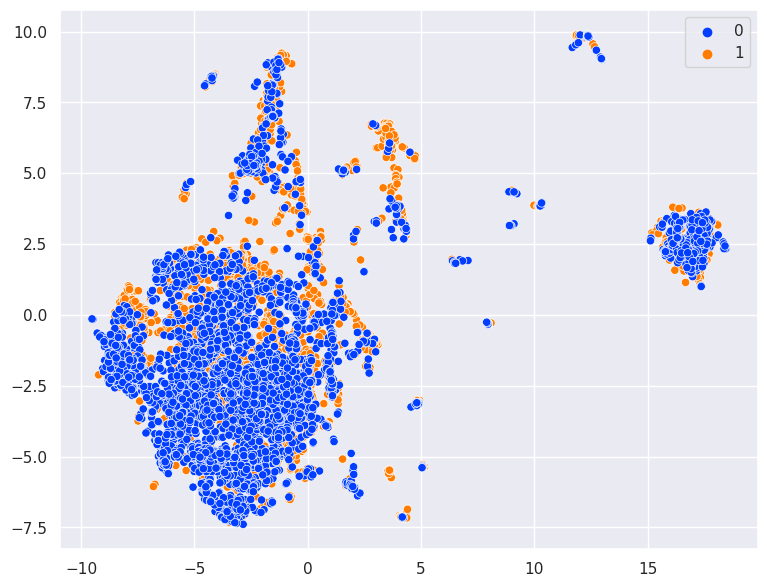

In [130]:
sns.scatterplot(x=MixMACCS_without_graph_embeddings_tsne[:, 0], y=MixMACCS_without_graph_embeddings_tsne[:, 1], hue=y_extra.values, legend='full', palette=palette)

## Draw comparition diagrams

In [141]:
def add_scores(df_update, scores, embedding, model):
    for score in scores:
        df_update = df_update.append({'score': score, 'embedding': embedding, 'model': model}, ignore_index=True)
    return df_update

In [142]:
df_scores = pd.DataFrame(columns=['score', 'embedding', 'model'])
df_scores = add_scores(df_scores, rfc_MACCS_scores, 'MACCS', 'rfc') 
df_scores = add_scores(df_scores, gbc_MACCS_scores, 'MACCS', 'gbc')
df_scores = add_scores(df_scores, svc_MACCS_scores, 'MACCS', 'svc')
df_scores = add_scores(df_scores, XGB_MACCS_scores, 'MACCS', 'xgb')

df_scores = add_scores(df_scores, rfc_ECFP_scores, 'ECFP', 'rfc') 
df_scores = add_scores(df_scores, gbc_ECFP_scores, 'ECFP', 'gbc')
df_scores = add_scores(df_scores, svc_ECFP_scores, 'ECFP', 'svc')
df_scores = add_scores(df_scores, xgb_ECFP_scores, 'ECFP', 'xgb')
df_scores

,score,embedding,model
0,0.775000,MACCS,rfc
1,0.779564,MACCS,rfc
2,0.790671,MACCS,rfc
3,0.796892,MACCS,rfc
4,0.772596,MACCS,rfc
5,0.801084,MACCS,gbc
6,0.788281,MACCS,gbc
7,0.808903,MACCS,gbc
8,0.809013,MACCS,gbc
9,0.790083,MACCS,gbc


<Axes: xlabel='score', ylabel='embedding'>

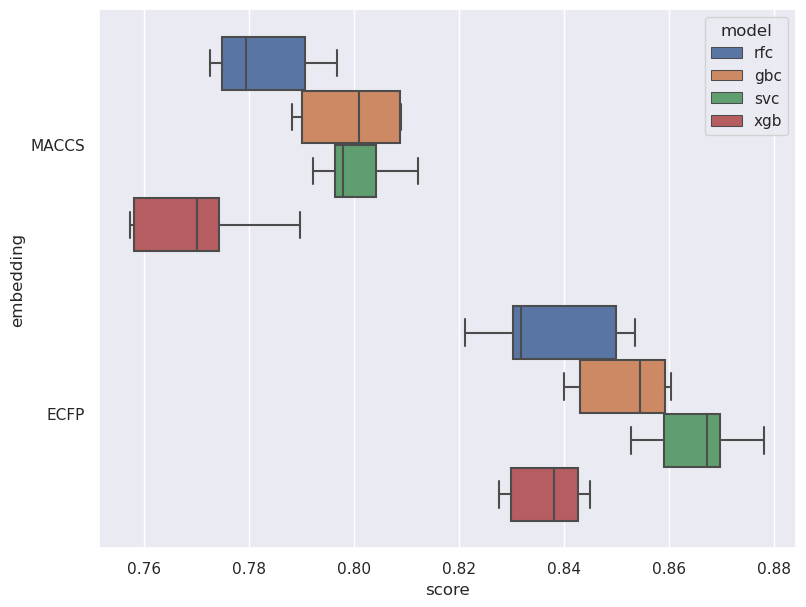

In [144]:
sns.boxplot(data=df_scores, x="score", y="embedding", hue="model")

In [149]:
print(rfc_MACCS_scores.sum() / 5)
print(gbc_MACCS_scores.sum() / 5)
print(svc_MACCS_scores.sum() / 5)
print(XGB_MACCS_scores.sum() / 5)

print(rfc_ECFP_scores.sum() / 5)
print(gbc_ECFP_scores.sum() / 5)
print(svc_ECFP_scores.sum() / 5)
print(xgb_ECFP_scores.sum() / 5)

0.7829447419249043
0.7994727430085752
0.8006560849572553
0.7699782933871213
0.8373908128037915
0.8515076211482707
0.8654637208087219
0.8367399851934992


# Raw data

### Upload raw data from Dropbox

In [ ]:
!wget https://www.dropbox.com/s/t8k0g5hb5vr36q8/drugs.zip && unzip drugs.zip;

In [ ]:
!wget https://www.dropbox.com/s/947439bx8tdcg9a/all_compounds.zip && unzip all_compounds.zip;

In [ ]:
def extract_species(row):
    entry = row['molecule_properties']
    try:
        entry_dict = ast.literal_eval(entry)
        return entry_dict['molecular_species']
    except ValueError:
        return None

def extract_structure(row):
    entry = row['molecule_structures']
    try:
        entry_dict = ast.literal_eval(entry)
        return entry_dict['canonical_smiles'], entry_dict['molfile']
    except ValueError:
        return None, None

#### Process drugs

In [ ]:
df_drugs = pd.read_csv('drugs.csv')
df_drugs.head(1)

,applicants,atc_classification,availability_type,biotherapeutic,black_box,black_box_warning,chirality,development_phase,drug_type,first_approval,...,usan_stem,usan_stem_definition,usan_stem_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year,atc_code_description
0,"['Dava Pharmaceuticals Inc', 'American Therape...","[{'code': 'C02CA01', 'description': 'CARDIOVAS...",1,NaN,0,0,2,4.0,1,1976.0,...,-azosin,antihypertensives (prazosin type),-azosin(-azosin),1968.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_drugs.shape

(14816, 36)

In [ ]:
df_drugs[df_drugs['development_phase'] > 0].shape[0] == (2994+2292+1600+1507+23)

True

In [ ]:
df_drugs_target = df_drugs[df_drugs['development_phase'] > 0][['molecule_chembl_id', 'molecule_properties', 'molecule_structures']]

In [ ]:
df_drugs_target.head(1)

,molecule_chembl_id,molecule_properties,molecule_structures
0,CHEMBL2,"{'alogp': '1.78', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...


In [ ]:
df_drugs_target['molecular_species'] = df_drugs_target.apply(lambda x: extract_species(x), axis=1)
res_apply = df_drugs_target.apply(lambda x: extract_structure(x), axis=1)
smiles = []
molfiles = []
for smile, molfile in res_apply:
    smiles.append(smile)
    molfiles.append(molfile)
df_drugs_target['smile'] = smiles
df_drugs_target['molfile'] = molfiles

In [ ]:
df_drugs_target.head()

,molecule_chembl_id,molecule_properties,molecule_structures,molecular_species,smile,molfile
0,CHEMBL2,"{'alogp': '1.78', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...,NEUTRAL,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,\n RDKit 2D\n\n 28 31 0 0 0 0...
1,CHEMBL3,"{'alogp': '1.85', 'aromatic_rings': 1, 'cx_log...","{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '...",BASE,CN1CCC[C@H]1c1cccnc1,\n RDKit 2D\n\n 12 13 0 0 1 0...
2,CHEMBL4,"{'alogp': '1.54', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...,ACID,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,\n RDKit 2D\n\n 26 29 0 0 0 0...
3,CHEMBL5,"{'alogp': '1.42', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...,ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,\n RDKit 2D\n\n 17 18 0 0 0 0...
4,CHEMBL6246,"{'alogp': '1.31', 'aromatic_rings': 4, 'cx_log...",{'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)o...,ACID,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,\n RDKit 2D\n\n 22 25 0 0 0 0...


In [ ]:
df_drugs_target.isna().sum()

molecule_chembl_id        0
molecule_properties    2694
molecule_structures    2840
molecular_species      3354
smile                  2840
molfile                2840
dtype: int64

In [ ]:
df_drugs_target = df_drugs_target[df_drugs_target['smile'].notnull()]

# df_drugs_target = df_drugs_target[(df_drugs_target['molecular_species'] == 'BASE') | \
#                                   (df_drugs_target['molecular_species'] == 'ACID') | \
#                                   (df_drugs_target['molecular_species'] == 'NEUTRAL')]

In [ ]:
df_drugs_target.isna().sum()

molecule_chembl_id       0
molecule_properties      0
molecule_structures      0
molecular_species      514
smile                    0
molfile                  0
dtype: int64

In [ ]:
df_drugs_target.shape

(5576, 6)

In [ ]:
df_drugs_target.drop('molecule_structures', axis=1, inplace=True)
df_drugs_target.to_csv('drugs_data_cleaned.csv')

#### Process other compounds

In [ ]:
df_all = pd.read_csv('all_compounds.csv', sep=';')
df_all.head(1)

<ipython-input-61-2e008032e690>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('all_compounds.csv', sep=';')


,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL248825,NaN,NaN,Small molecule,NaN,337.2,4.0,5.0,5.27,39.44,...,22,3,0,1,336.032,-0.69,NEUTRAL,C17H14Cl2O3,O=C(OCc1ccco1)C1=C(c2ccc(Cl)c(Cl)c2)CCC1,GBLKVAKAYJPCCZ-UHFFFAOYSA-N


In [ ]:
a = {'alogp': '1.78', 'aromatic_rings': 3, 'cx_logd': '1.43', 'cx_logp': '1.65', 'cx_most_apka': None, 'cx_most_bpka': '7.24', 'full_molformula': 'C19H21N5O4', 'full_mwt': '383.41', 'hba': 8, 'hba_lipinski': 9, 'hbd': 1, 'hbd_lipinski': 2, 'heavy_atoms': 28, 'molecular_species': 'NEUTRAL', 'mw_freebase': '383.41', 'mw_monoisotopic': '383.1594', 'np_likeness_score': '-1.29', 'num_lipinski_ro5_violations': 0, 'num_ro5_violations': 0, 'psa': '106.95', 'qed_weighted': '0.73', 'ro3_pass': 'N', 'rtb': 4}
a.keys()

dict_keys(['alogp', 'aromatic_rings', 'cx_logd', 'cx_logp', 'cx_most_apka', 'cx_most_bpka', 'full_molformula', 'full_mwt', 'hba', 'hba_lipinski', 'hbd', 'hbd_lipinski', 'heavy_atoms', 'molecular_species', 'mw_freebase', 'mw_monoisotopic', 'np_likeness_score', 'num_lipinski_ro5_violations', 'num_ro5_violations', 'psa', 'qed_weighted', 'ro3_pass', 'rtb'])

In [ ]:
df_all.shape

(2354965, 33)

In [ ]:
df_all.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')

In [ ]:
drugs_ids = set(df_drugs_target['molecule_chembl_id'])
final_dataset = df_all[df_all['ChEMBL ID'].isin(drugs_ids)]

others = df_all[~df_all['ChEMBL ID'].isin(drugs_ids)]
others = others[others['Smiles'].notnull()]
others_short = others.sample(n=len(drugs_ids), random_state=42)

final_dataset = pd.concat([final_dataset, others_short], ignore_index=True)
final_dataset.shape

(11152, 33)

In [ ]:
final_dataset['is_drug'] = final_dataset['ChEMBL ID'].isin(drugs_ids) + 0

In [ ]:
final_dataset.to_csv('mixed_dataset.csv')

---

#Draft

### Try to choose target variable

In [ ]:
df['chirality'].value_counts()

 1    6989
 2    4757
 0    2082
-1     988
Name: chirality, dtype: int64

In [ ]:
for i in range(10):
    print(df['atc_classification'].iloc[i])

[{'code': 'C02CA01', 'description': 'CARDIOVASCULAR SYSTEM: ANTIHYPERTENSIVES: ANTIADRENERGIC AGENTS, PERIPHERALLY ACTING: Alpha-adrenoreceptor antagonists'}]
[{'code': 'N07BA01', 'description': 'NERVOUS SYSTEM: OTHER NERVOUS SYSTEM DRUGS: DRUGS USED IN ADDICTIVE DISORDERS: Drugs used in nicotine dependence'}]
[{'code': 'J01MA01', 'description': 'ANTIINFECTIVES FOR SYSTEMIC USE: ANTIBACTERIALS FOR SYSTEMIC USE: QUINOLONE ANTIBACTERIALS: Fluoroquinolone'}, {'code': 'S02AA16', 'description': 'SENSORY ORGANS: OTOLOGICALS: ANTIINFECTIVES: Antiinfective'}, {'code': 'S01AE01', 'description': 'SENSORY ORGANS: OPHTHALMOLOGICALS: ANTIINFECTIVES: Fluoroquinolones'}]
[{'code': 'J01MB02', 'description': 'ANTIINFECTIVES FOR SYSTEMIC USE: ANTIBACTERIALS FOR SYSTEMIC USE: QUINOLONE ANTIBACTERIALS: Other quinolones'}]
nan
nan
[{'code': 'M01AB51', 'description': 'MUSCULO-SKELETAL SYSTEM: ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS: ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS, NON-STEROIDS: Acetic acid 

In [ ]:
df['atc_classification'].isna().sum()

11355

In [ ]:
df['drug_type'].value_counts()

 1     10878
-1      1307
 6      1045
 5       785
 10      268
 4       144
 9       135
 2       121
 3        78
 8        55
Name: drug_type, dtype: int64

In [ ]:
df['availability_type'].value_counts()

-1    12428
 1     1730
 0      392
-2      184
 2       82
Name: availability_type, dtype: int64

In [ ]:
df['molecule_properties'].isna().sum()

3743

In [ ]:
species = dict()
for entry in df['molecule_properties']:
    # print(entry)
    try:
        entry_dict = ast.literal_eval(entry)
        val = entry_dict['molecular_species']
        if val in species:
            species[val] += 1
        else:
            species[val] = 1
    except ValueError:
        pass

In [ ]:
species

{'NEUTRAL': 5624, 'BASE': 2157, 'ACID': 1915, 'ZWITTERION': 349, None: 1028}

### Get all approved drugs

In [ ]:
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_properties__mw_freebase')
len(approved_drugs)

4194

In [ ]:
drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
lung_cancer_mols = molecules.filter(
    molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])

len(lung_cancer_mols)

HttpApplicationError: ignored

### Get drugs from ChEMBL


In [ ]:
drugs = new_client.drug
len(drugs)

# Filter drugs by approval year and name
# res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin")
# res

In [ ]:
# If it is necessary to download from ChEMBL
# drugs = new_client.drug
# df = pd.DataFrame.from_dict(drugs)
# df.head()

,applicants,atc_classification,availability_type,biotherapeutic,black_box,black_box_warning,chirality,development_phase,drug_type,first_approval,...,usan_stem,usan_stem_definition,usan_stem_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year,atc_code_description
0,"[Dava Pharmaceuticals Inc, American Therapeuti...","[{'code': 'C02CA01', 'description': 'CARDIOVAS...",1,None,0,0,2,4.0,1,1976.0,...,-azosin,antihypertensives (prazosin type),-azosin(-azosin),1968.0,None,None,0,None,NaN,NaN
1,"[Perrigo R And D Co, Glaxosmithkline Consumer ...","[{'code': 'N07BA01', 'description': 'NERVOUS S...",2,None,0,0,1,4.0,1,1984.0,...,None,None,None,1985.0,None,None,0,None,NaN,NaN
2,"[Bausch And Lomb Pharmaceuticals Inc, Mankind ...","[{'code': 'J01MA01', 'description': 'ANTIINFEC...",1,None,1,1,0,4.0,1,1990.0,...,-oxacin,antibacterials (quinolone derivatives),-oxacin(-oxacin),1984.0,None,None,0,None,NaN,NaN
3,"[Sun Pharmaceutical Industries Inc, Sanofi Ave...","[{'code': 'J01MB02', 'description': 'ANTIINFEC...",0,None,0,0,2,4.0,1,1964.0,...,nal-,narcotic agonists/antagonists (normorphine type),nal-(nal-),1962.0,None,None,0,None,NaN,NaN
4,None,NaN,-1,None,0,0,2,2.0,1,NaN,...,None,None,None,NaN,None,None,0,None,NaN,NaN


In [ ]:
# df.to_csv('drugs.csv', index=False)

In [ ]:
molecule = new_client.molecule
mols = molecule.filter(prodrug__exact='0')
len(mols)

17304

In [ ]:
molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutics)
# not suitable to predict because there are too many gaps for drugs

23060

In [ ]:
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4)
len(approved_drugs)

4194

In [ ]:
molecule = new_client.molecule
print(molecule[0])
# approved_drugs = molecule.filter(max_phase=4)
# len(approved_drugs)

{'atc_classifications': [], 'availability_type': -1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chirality': -1, 'cross_references': [], 'dosed_ingredient': False, 'first_approval': None, 'first_in_class': -1, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': -1, 'max_phase': None, 'molecule_chembl_id': 'CHEMBL6329', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL6329', 'molecule_chembl_id': 'CHEMBL6329', 'parent_chembl_id': 'CHEMBL6329'}, 'molecule_properties': {'alogp': '2.11', 'aromatic_rings': 3, 'cx_logd': '2.69', 'cx_logp': '3.63', 'cx_most_apka': '6.48', 'cx_most_bpka': None, 'full_molformula': 'C17H12ClN3O3', 'full_mwt': '341.75', 'hba': 5, 'hba_lipinski': 6, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 24, 'molecular_species': 'ACID', 'mw_freebase': '341.75', 'mw_monoisotopic': '341.0567', 'np_likeness_score': '-1.56', 'num_lipinski_ro5_violations': 0, 'num_ro5_violations': 0, 'psa': '84.82', 'qed_weighted': '0.74', 'ro3_pass': 'N'